# LSTM Example

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

sns.set(rc={'figure.figsize':(15,8)})

## Data preprocessing

In [2]:
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

In [3]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
data.shape

(144, 2)

In [5]:
data['Month'].min()

Timestamp('1949-01-01 00:00:00')

In [6]:
data['Month'].max()

Timestamp('1960-12-01 00:00:00')

## EDA

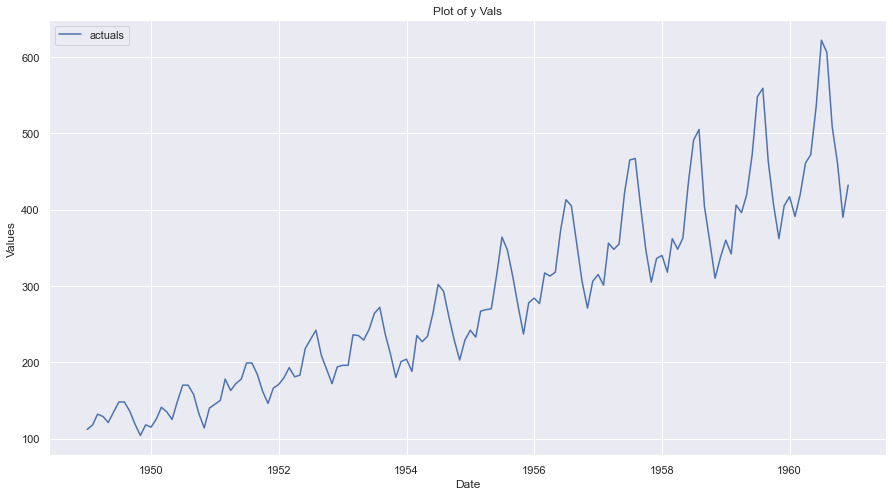

In [7]:
f = Forecaster(y=data['#Passengers'],current_dates=data['Month'])
f.plot()

In [8]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

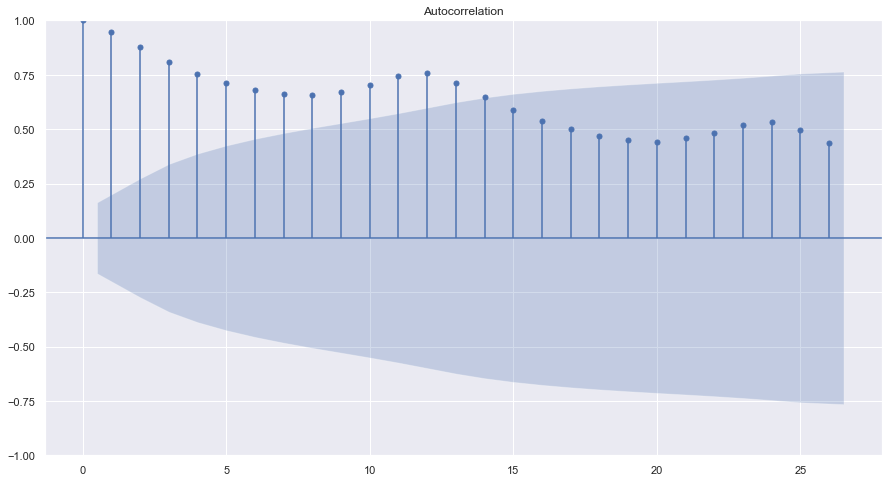

In [9]:
f.plot_acf(lags=26)
plt.show()

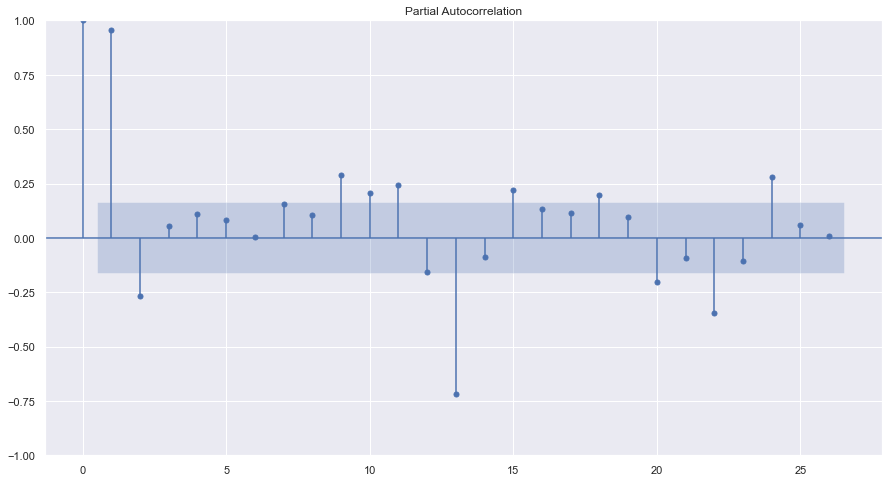

In [10]:
f.plot_pacf(lags=26)
plt.show()

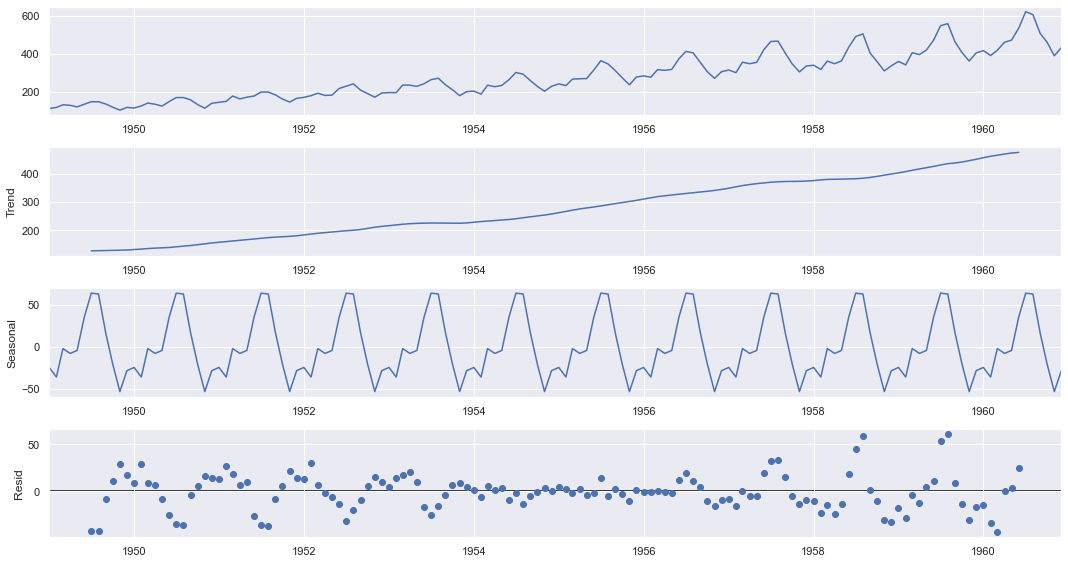

In [11]:
f.seasonal_decompose().plot()
plt.show()

In [12]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

0.8153688792060569
0.9918802434376411


## LSTM Model

In [13]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

### Attempt 1

5/5 [==============================] - 1s 2ms/step - loss: 0.3386


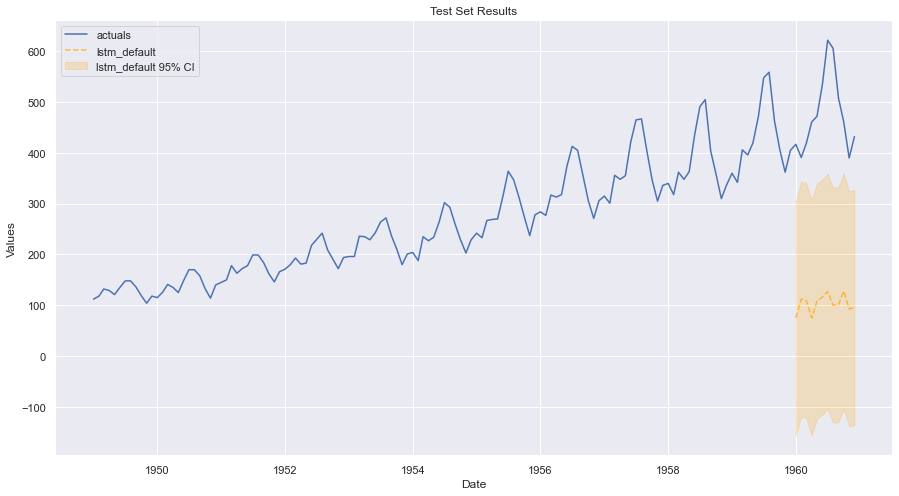

In [14]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

### Attempt 2

4/4 [==============================] - 1s 7ms/step - loss: 0.3503


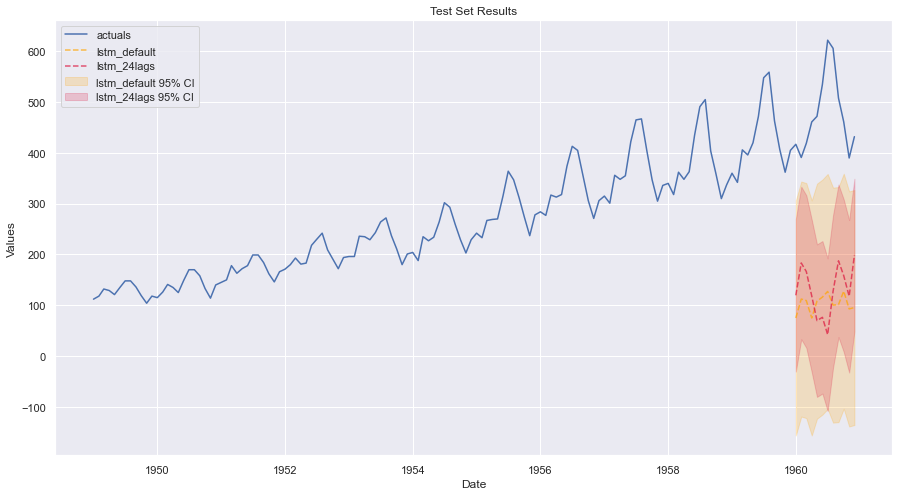

In [15]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

### Attempt 3

Epoch 1/5
3/3 [==============================] - 2s 193ms/step - loss: 0.4549 - val_loss: 0.1873
Epoch 2/5
3/3 [==============================] - 0s 17ms/step - loss: 0.4461 - val_loss: 0.1813
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 0.4374 - val_loss: 0.1752
Epoch 4/5
3/3 [==============================] - 0s 16ms/step - loss: 0.4287 - val_loss: 0.1691
Epoch 5/5
3/3 [==============================] - 0s 15ms/step - loss: 0.4199 - val_loss: 0.1631
Epoch 1/5
3/3 [==============================] - 2s 166ms/step - loss: 0.4308 - val_loss: 0.1668
Epoch 2/5
3/3 [==============================] - 0s 16ms/step - loss: 0.4225 - val_loss: 0.1609
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 0.4142 - val_loss: 0.1551
Epoch 4/5
3/3 [==============================] - 0s 17ms/step - loss: 0.4059 - val_loss: 0.1493
Epoch 5/5
3/3 [==============================] - 0s 15ms/step - loss: 0.3975 - val_loss: 0.1434


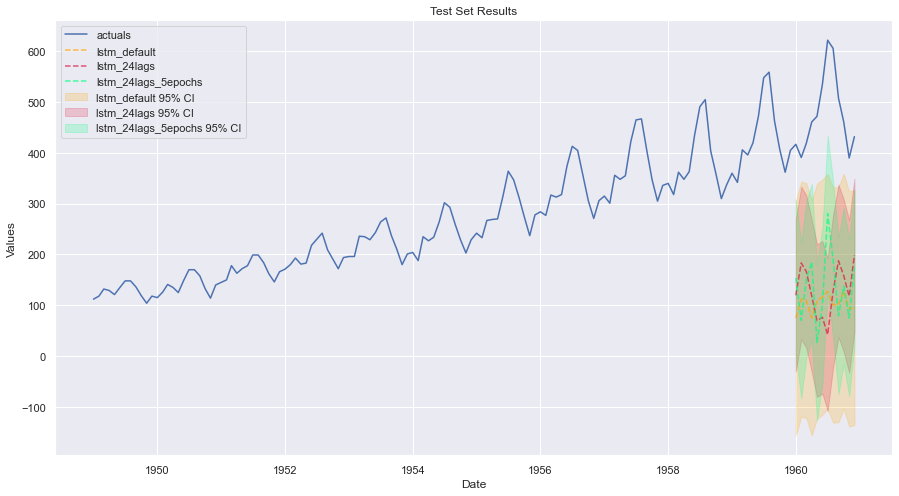

In [16]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)
f.plot_test_set(ci=True)

### Attempt 4

Epoch 1/25
3/3 [==============================] - 4s 432ms/step - loss: 0.4674 - val_loss: 0.1867
Epoch 2/25
3/3 [==============================] - 0s 27ms/step - loss: 0.4491 - val_loss: 0.1720
Epoch 3/25
3/3 [==============================] - 0s 26ms/step - loss: 0.4278 - val_loss: 0.1543
Epoch 4/25
3/3 [==============================] - 0s 26ms/step - loss: 0.4020 - val_loss: 0.1330
Epoch 5/25
3/3 [==============================] - 0s 28ms/step - loss: 0.3686 - val_loss: 0.1132
Epoch 6/25
3/3 [==============================] - 0s 26ms/step - loss: 0.3275 - val_loss: 0.1103
Epoch 7/25
3/3 [==============================] - 0s 26ms/step - loss: 0.2848 - val_loss: 0.1334
Epoch 8/25
3/3 [==============================] - 0s 34ms/step - loss: 0.2618 - val_loss: 0.1648
Epoch 9/25
3/3 [==============================] - 0s 31ms/step - loss: 0.2514 - val_loss: 0.1769
Epoch 10/25
3/3 [==============================] - 0s 27ms/step - loss: 0.2380 - val_loss: 0.1686
Epoch 11/25
3/3 [===========

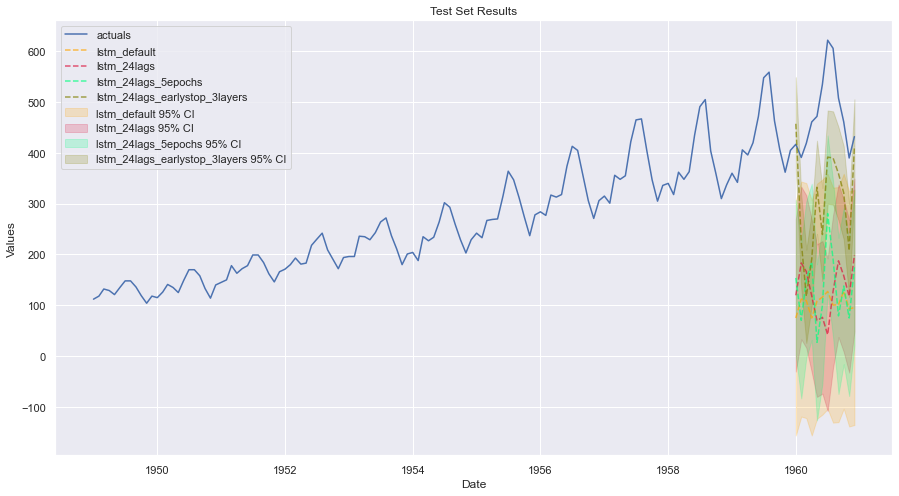

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

### Attempt 5

Epoch 1/15
3/3 [==============================] - 6s 633ms/step - loss: 0.4843 - val_loss: 0.2002
Epoch 2/15
3/3 [==============================] - 0s 58ms/step - loss: 0.3794 - val_loss: 0.1141
Epoch 3/15
3/3 [==============================] - 0s 61ms/step - loss: 0.2180 - val_loss: 0.1044
Epoch 4/15
3/3 [==============================] - 0s 67ms/step - loss: 0.1162 - val_loss: 0.0598
Epoch 5/15
3/3 [==============================] - 0s 68ms/step - loss: 0.1347 - val_loss: 0.0759
Epoch 6/15
3/3 [==============================] - 0s 65ms/step - loss: 0.1231 - val_loss: 0.0829
Epoch 7/15
3/3 [==============================] - 0s 63ms/step - loss: 0.1053 - val_loss: 0.0593
Epoch 8/15
3/3 [==============================] - ETA: 0s - loss: 0.099 - 0s 62ms/step - loss: 0.0993 - val_loss: 0.0564
Epoch 9/15
3/3 [==============================] - 0s 65ms/step - loss: 0.0973 - val_loss: 0.0532
Epoch 10/15
3/3 [==============================] - 0s 61ms/step - loss: 0.0940 - val_loss: 0.0525
Epoc

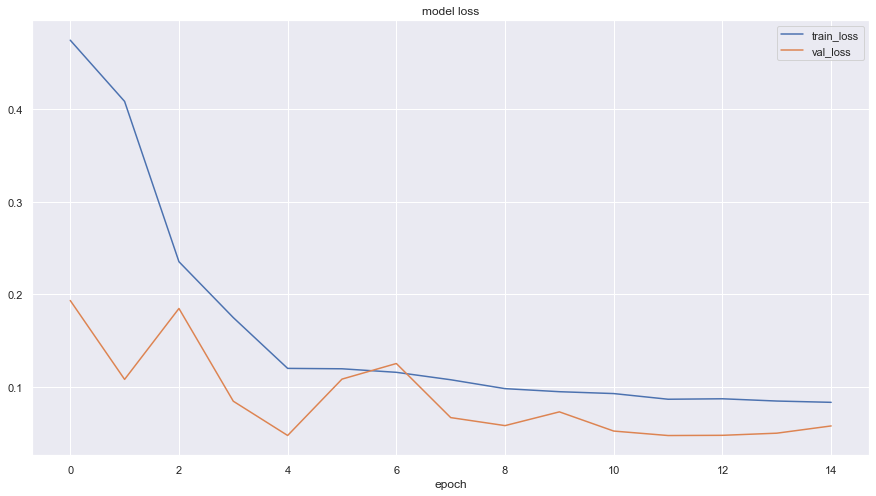

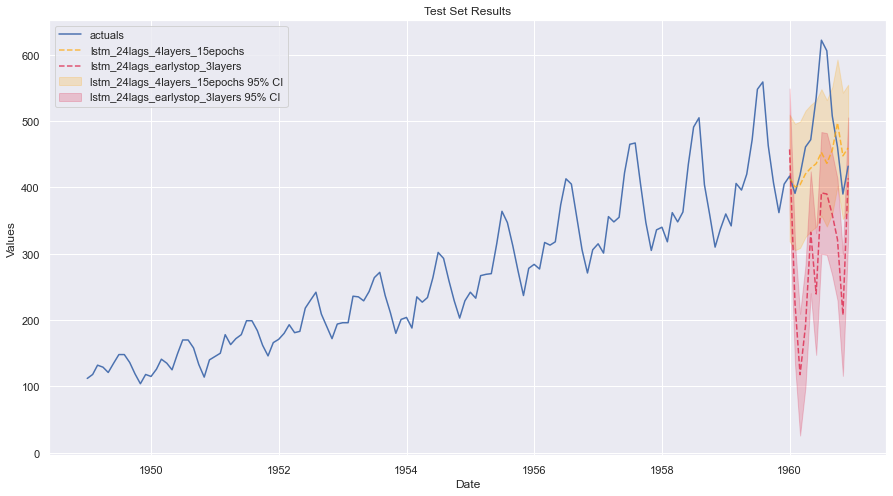

In [18]:
f.manual_forecast(call_me='lstm_24lags_4layers_15epochs',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

### Attempt 6

Epoch 1/300
5/5 [==============================] - 26s 1s/step - loss: 0.4565 - val_loss: 0.2858
Epoch 2/300
5/5 [==============================] - 1s 295ms/step - loss: 0.1735 - val_loss: 0.2274
Epoch 3/300
5/5 [==============================] - 2s 302ms/step - loss: 0.1574 - val_loss: 0.2142
Epoch 4/300
5/5 [==============================] - 1s 300ms/step - loss: 0.1419 - val_loss: 0.3462
Epoch 5/300
5/5 [==============================] - 2s 308ms/step - loss: 0.1704 - val_loss: 0.1709
Epoch 6/300
5/5 [==============================] - 2s 306ms/step - loss: 0.1314 - val_loss: 0.2677
Epoch 7/300
5/5 [==============================] - 2s 310ms/step - loss: 0.1403 - val_loss: 0.0713
Epoch 8/300
5/5 [==============================] - 1s 300ms/step - loss: 0.1581 - val_loss: 0.1365
Epoch 9/300
5/5 [==============================] - 2s 307ms/step - loss: 0.1226 - val_loss: 0.0815
Epoch 10/300
5/5 [==============================] - 2s 304ms/step - loss: 0.1073 - val_loss: 0.1793
Epoch 11/30

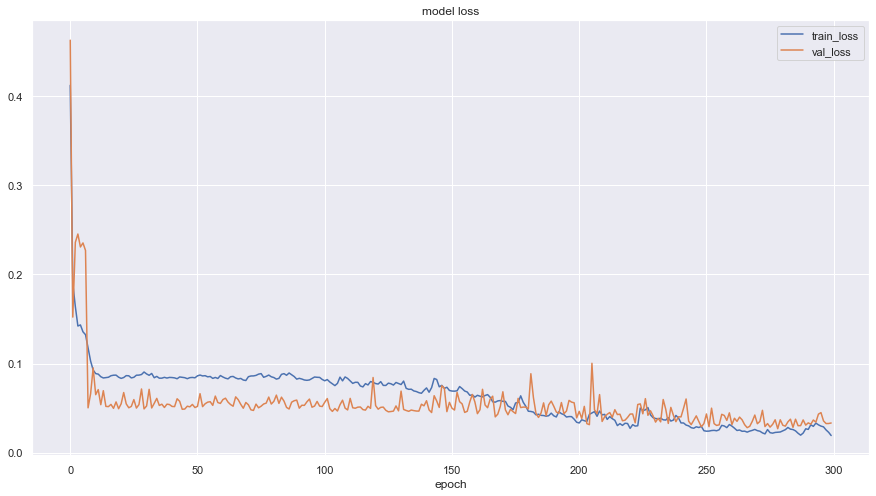

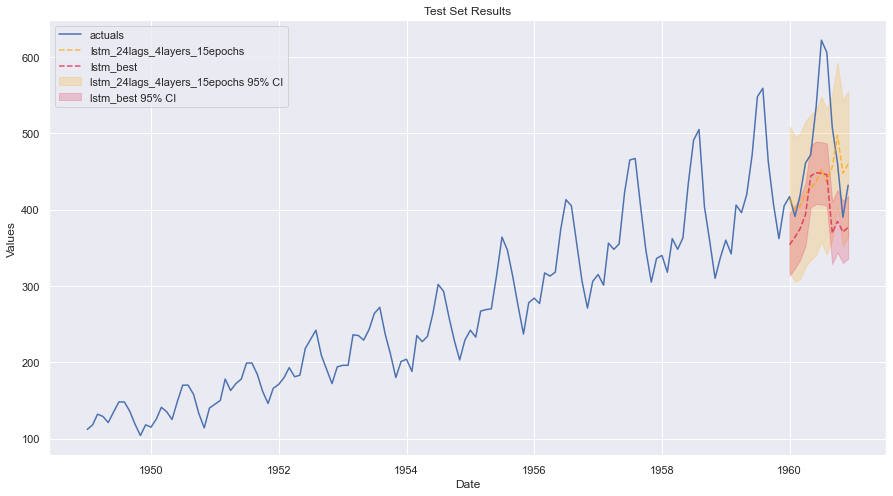

In [19]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=16,
                  epochs=300,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

## MLR Modeling

In [20]:
f.set_estimator('mlr')
f.add_ar_terms(24)
f.add_seasonal_regressors('month','quarter',dummy=True)
f.add_seasonal_regressors('year')
f.add_time_trend()
f.diff()

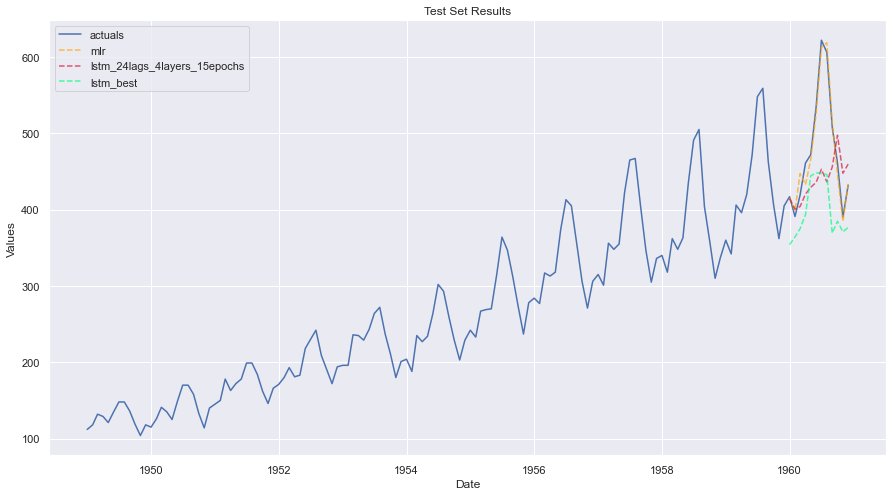

In [28]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_3')

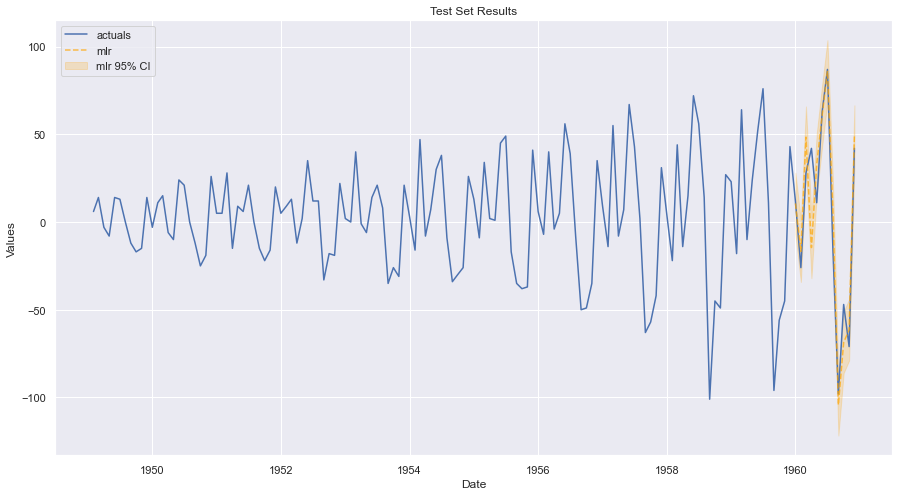

In [22]:
f.plot_test_set(models='mlr',ci=True)

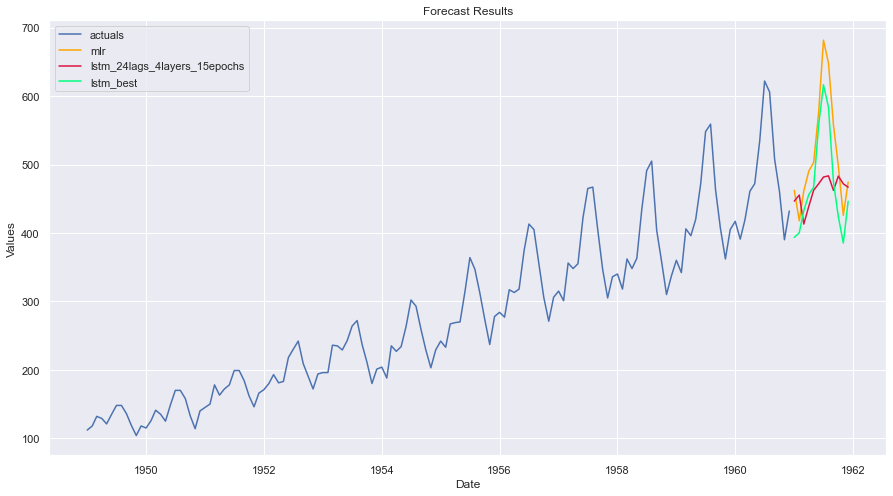

In [29]:
f.plot(order_by='LevelTestSetMAPE',models='top_3')

## Benchmarking

In [24]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname','LevelTestSetMAPE','LevelTestSetRMSE','LevelTestSetR2','best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.023420,13.932124,0.964960,True
1,lstm_24lags_4layers_15epochs,0.114650,81.210940,-0.190586,False
2,lstm_best,0.154356,93.090478,-0.564380,False
3,lstm_24lags_earlystop_3layers,0.375480,198.842435,-6.137560,False
4,lstm_24lags,0.712334,362.077454,-22.666530,False
5,lstm_24lags_5epochs,0.719090,347.686110,-20.822590,False
6,lstm_default,0.779915,379.298924,-24.971368,False


## Export Results

In [25]:
f.export_forecasts_with_cis('mlr')

,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,1961-01-01,47.711290,30.246319,12.781347,mlr,0.95
1,1961-02-01,-27.057760,-44.522731,-61.987702,mlr,0.95
2,1961-03-01,61.142910,43.677939,26.212968,mlr,0.95
3,1961-04-01,46.528396,29.063425,11.598454,mlr,0.95
4,1961-05-01,29.862361,12.397390,-5.067581,mlr,0.95
5,1961-06-01,90.724956,73.259985,55.795014,mlr,0.95
6,1961-07-01,123.005797,105.540825,88.075854,mlr,0.95
7,1961-08-01,-16.122173,-33.587144,-51.052115,mlr,0.95
8,1961-09-01,-73.067354,-90.532325,-107.997296,mlr,0.95
9,1961-10-01,-41.907826,-59.372797,-76.837768,mlr,0.95


In [26]:
f.export_test_set_preds_with_cis('mlr')

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,1960-01-01,28.066682,10.601711,12.0,-6.863261,mlr,0.95
1,1960-02-01,0.741874,-16.723097,-26.0,-34.188068,mlr,0.95
2,1960-03-01,65.886942,48.421971,28.0,30.956999,mlr,0.95
3,1960-04-01,2.898761,-14.566210,42.0,-32.031182,mlr,0.95
4,1960-05-01,50.348916,32.883945,11.0,15.418974,mlr,0.95
5,1960-06-01,78.363001,60.898029,63.0,43.433058,mlr,0.95
6,1960-07-01,103.669621,86.204650,87.0,68.739679,mlr,0.95
7,1960-08-01,23.470167,6.005196,-16.0,-11.459775,mlr,0.95
8,1960-09-01,-86.780501,-104.245472,-98.0,-121.710443,mlr,0.95
9,1960-10-01,-51.156100,-68.621071,-47.0,-86.086042,mlr,0.95


### Export Feature Info

In [27]:
f.save_feature_importance()
f.export_feature_importance('mlr')

,weight,std
feature,,
AR1,0.360410,0.057652
AR12,0.218659,0.026116
AR4,0.214434,0.031875
AR10,0.184816,0.017657
AR21,0.131055,0.009248
AR13,0.116967,0.011384
AR18,0.111233,0.012176
AR2,0.088423,0.019647
AR11,0.085070,0.011649
